In [1]:
import requests
import numpy as np
import pandas as pd
from PIL import Image

import torch
from embaddings.encoder import BERTEncoder
import torch.nn.functional as F

c:\Users\noyoy\Documents\kaleidoo-hw\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def image_from_url(url):
    img = Image.open(requests.get(url, stream=True).raw)
    return img.resize((img.width // 10, img.height // 10))

In [3]:
media_df = pd.read_parquet('./data/media_cleaned.pqt')

In [16]:
len(set(media_df.tags.apply(list).sum()))

3668

In [8]:
sentences = media_df.descriptionHebrew.to_list()

In [9]:
encoder = BERTEncoder(embed_method='cls')

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
embeddings = encoder.get_embedding(sentences)

In [63]:
torch.save(embeddings.to(torch.float16), './data/media_hebrew_embeddings.pt')

In [68]:
embeddings = torch.load('./data/media_hebrew_embeddings.pt')

In [69]:
string = 'לוי אשכול'

sentence_embedding = encoder.get_embedding(string).to(torch.float16)

In [70]:
similarities = F.cosine_similarity(sentence_embedding, embeddings).numpy()

Original sentence: ביקור רה"מ לוי אשכול בליבריה. בצילום, שלט ברחובות מונרוביה לכבוד רה"מ אשכול.


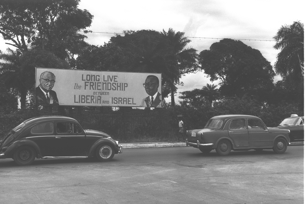

In [71]:
i = np.argmax(similarities)
print(f'Original sentence: {sentences[i]}')
image_from_url(media_df.iloc[i].url)

In [72]:
# this is old, replace with the new code in user_interface.py
tags = set(media_df.iloc[i].tags['tags'])
ths = media_df.tags.apply(lambda x: len(set(x['tags']).intersection(tags)) / len(tags))

In [73]:
media_df.loc[ths > 0.6]

,url,descriptionHebrew,descriptionEnglish,tags
369,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה, אפריקה. בצילום, ...",CHILDREN OF ISRAEL EXPERTS WORKING IN LIBERIA ...,"{'tags': ['1.4', 'לוי אשכול', 'מונרוביה', 'אפר..."
434,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול ורעייתו מרים בליבריה. בצי...","P.M. LEVY ESHKOL AND HIS WIFE MIRIAM, PRESIDEN...","{'tags': ['1.4', 'לוי אשכול', 'מונרוביה', 'טוב..."
633,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול ורעייתו מרים בליבריה. בצי...","P.M. LEVY ESHKOL AND HIS WIFE MIRIAM, PRESIDEN...","{'tags': ['1.4', 'ליבריה', 'מונרוביה', 'אפריקה..."
917,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה. בצילום, רה""מ אשכ...",P.M. LEVY ESHKOL SPEAKING IN THE UNIVERSITY OF...,"{'tags': ['1.4', 'לוי אשכול', 'ליבריה', 'אוניב..."
1270,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה. בצילום, פגישת עב...",CONFERENCE OF PRES. TUBMAN OF LIBERIA AND P.M....,"{'tags': ['1.4', 'טובמן ויליאם', 'ליבריה', 'מו..."
2091,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול ורעייתו מרים בליבריה, אפר...","P.M. LEVY ESHKOL AND HIS WIFE MIRIAM, PRES. & ...","{'tags': ['1.4', 'לוי אשכול', 'מרים אשכול', 'ט..."
2207,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה. בצילום, רה""מ מסי...",PRIME MINISTER LEVY ESHKOL IN THE HARBOUR OF M...,"{'tags': ['1.4', 'אפריקה', 'מונרוביה', 'ליבריה..."
2562,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה, אפריקה. בצילום, ...",P.M. LEVY ESHKOL AND PRESIDENT TUBMAN AT THE D...,"{'tags': ['1.4', 'לוי אשכול', 'טובמן ויליאם', ..."
2642,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה, אפריקה. בצילום, ...",ISRAEL FLAG AND P.M. LEVY ESHKOL'S PICTURE DEC...,"{'tags': ['1.4', 'לוי אשכול', 'ליבריה', 'שלט',..."
2834,https://storage.googleapis.com/press-office-de...,"ביקור רה""מ לוי אשכול בליבריה. בצילום, שלט ברחו...",POSTER PUT UP IN THE STREETS BY THE MONROVIA M...,"{'tags': ['1.4', 'לוי אשכול', 'מונרוביה', 'רחו..."


In [74]:
%%bash

ls -lh ./data/

total 13M
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging-fixed.sql
-rwxrwxrwx 1 noyk noyk 2.9M Jun 28 10:43 kalos-media-tagging.sql
-rwxrwxrwx 1 noyk noyk 2.5M Jun 28 20:48 media.csv
-rwxrwxrwx 1 noyk noyk 468K Jun 29 11:29 media_cleaned.pqt
-rwxrwxrwx 1 noyk noyk 3.7M Jun 29 13:57 media_hebrew_embeddings.pt
